In [292]:
from nltk.tokenize import word_tokenize
from collections import Counter
import os
import matplotlib.pyplot as plt
import re


In [293]:
kashubian_corpus_dir = r"C:\Users\erykd\Desktop\CS6363_Proj\kashubian_corpus_collection" # collections of various kashubian texts we found
kashub_alphabet = "aąãbcdeéëfghijklłmnńoòóôprstuùwyzż" # string that will help us focus on kashubian letters in the corpus
corpus_collection_str = ""
for corpus in os.listdir(kashubian_corpus_dir):
    with open(os.path.join(kashubian_corpus_dir, corpus)) as f:
        corpus_collection_str += f.read().lower() + " "
        f.close()


kashub_counter = Counter(
    c for c in corpus_collection_str.casefold()
    if c in kashub_alphabet
)

print("Kashubian letter frequencies:")
# sampling 15 of the most common character occurences
for char, count in kashub_counter.most_common():
    print(f"{char:2} → {count:5}")


Kashubian letter frequencies:
a  → 338815
i  → 313833
z  → 300052
e  → 273178
n  → 234801
s  → 232666
o  → 221992
c  → 221098
r  → 215649
w  → 190234
k  → 166925
t  → 166740
d  → 158495
j  → 138770
m  → 134561
ë  → 133837
ò  → 124910
p  → 118160
l  → 107609
ł  → 83807
b  → 83615
ô  → 76749
g  → 72685
h  → 63594
u  → 61317
é  → 60157
ó  → 48887
y  → 47050
ą  → 42857
ã  → 42833
ż  → 37515
ù  → 37175
ń  → 15756
f  → 11437


In [294]:
# same representation as previous but in terms of percentages
total = sum(kashub_counter.values())
kashub_percentages = [(char, (count / total) * 100) for char, count in kashub_counter.most_common()]

print("Letter percentages:")
for letter, percentage in kashub_percentages:
    print(f"{letter} → {percentage:.2f}%")

Letter percentages:
a → 7.40%
i → 6.86%
z → 6.55%
e → 5.97%
n → 5.13%
s → 5.08%
o → 4.85%
c → 4.83%
r → 4.71%
w → 4.16%
k → 3.65%
t → 3.64%
d → 3.46%
j → 3.03%
m → 2.94%
ë → 2.92%
ò → 2.73%
p → 2.58%
l → 2.35%
ł → 1.83%
b → 1.83%
ô → 1.68%
g → 1.59%
h → 1.39%
u → 1.34%
é → 1.31%
ó → 1.07%
y → 1.03%
ą → 0.94%
ã → 0.94%
ż → 0.82%
ù → 0.81%
ń → 0.34%
f → 0.25%


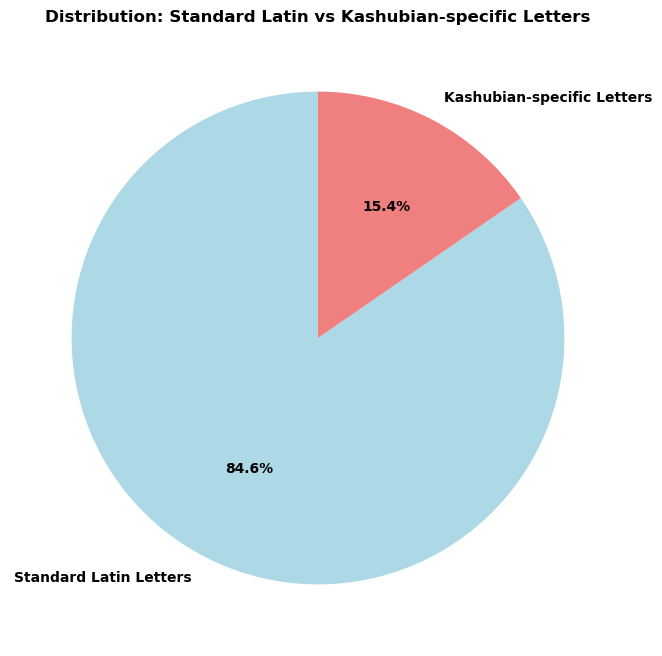

In [295]:
# standard alphabet to provide comparison
standard_latin = "abcdefghijklmnopqrstuvwxyz" 

# calculatulates total for each
standard_total = sum(kashub_counter[char] for char in standard_latin if char in kashub_counter)
kashub_specific_total = sum(kashub_counter[char] for char in kashub_alphabet if char not in standard_latin)

labels = ['Standard Latin Letters', 'Kashubian-specific Letters']
sizes = [standard_total, kashub_specific_total]
colors = ['lightblue', 'lightcoral']

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90,
                                   textprops={'fontweight': 'bold'})

# better contrast and visibility
for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.title('Distribution: Standard Latin vs Kashubian-specific Letters', fontweight='bold')
plt.show()

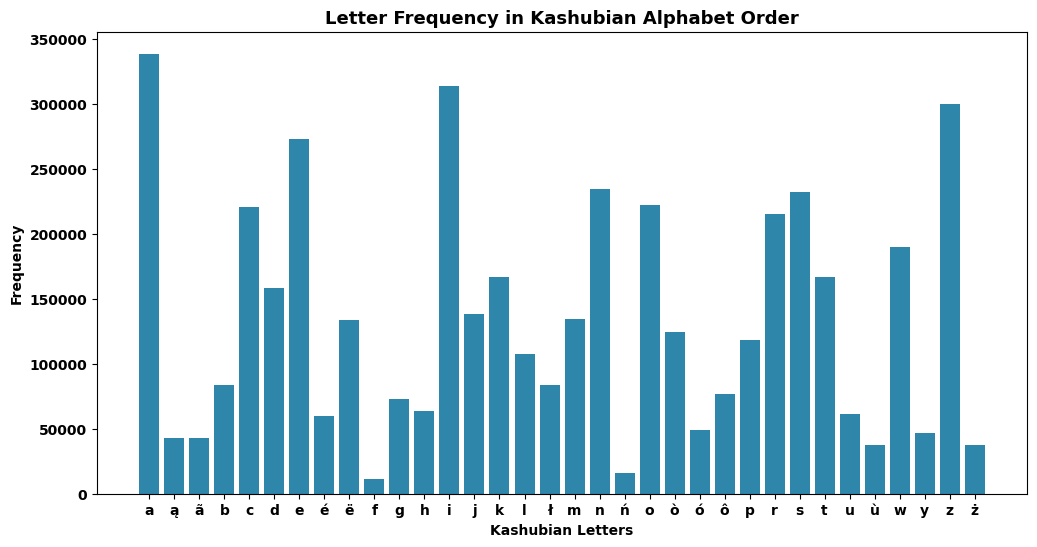

In [296]:
# ordering our letter-count pairs in order
letters = [char for char in kashub_alphabet if char in kashub_counter]
counts = [kashub_counter[char] for char in kashub_alphabet if char in kashub_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(letters, counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [297]:
# getting the frequency of digraphs
kashub_tokens = word_tokenize(corpus_collection_str.lower())

kashub_tokens = [re.sub(r'[^a-zà-ÿ\-]', '', token) for token in kashub_tokens if len(re.sub(r'[^a-zà-ÿ\-]', '', token)) > 1]

for token in kashub_tokens:
    cleaned_token = re.sub(r'[^a-zà-ÿ\-]', '', token)
    if len(cleaned_token) > 1:  # Your length filter
        cleaned_tokens.append(cleaned_token)

# getting the frequency of digraph    
digraph_list = ["ch", "cz", "dz", "dż", "rz", "sz"]

pattern = '|'.join(re.escape(dg) for dg in digraph_list)
digraph_counts = Counter(re.findall(pattern, corpus_collection_str))


print("Digraph frequencies:")
for digraph, count in digraph_counts.most_common():
    print(f"{digraph} → {count}")
    

Digraph frequencies:
cz → 71618
ch → 56583
rz → 51804
sz → 50637
dz → 34768
dż → 4017


In [298]:
# same representation as previous but in terms of percentages
total = sum(digraph_counts.values())
digraph_percentages = [(char, (count / total) * 100) for char, count in digraph_counts.most_common()]

print("Digraph percentages:")
for letter, percentage in digraph_percentages:
    print(f"{letter} → {percentage:.2f}%")

Digraph percentages:
cz → 26.58%
ch → 21.00%
rz → 19.23%
sz → 18.79%
dz → 12.90%
dż → 1.49%


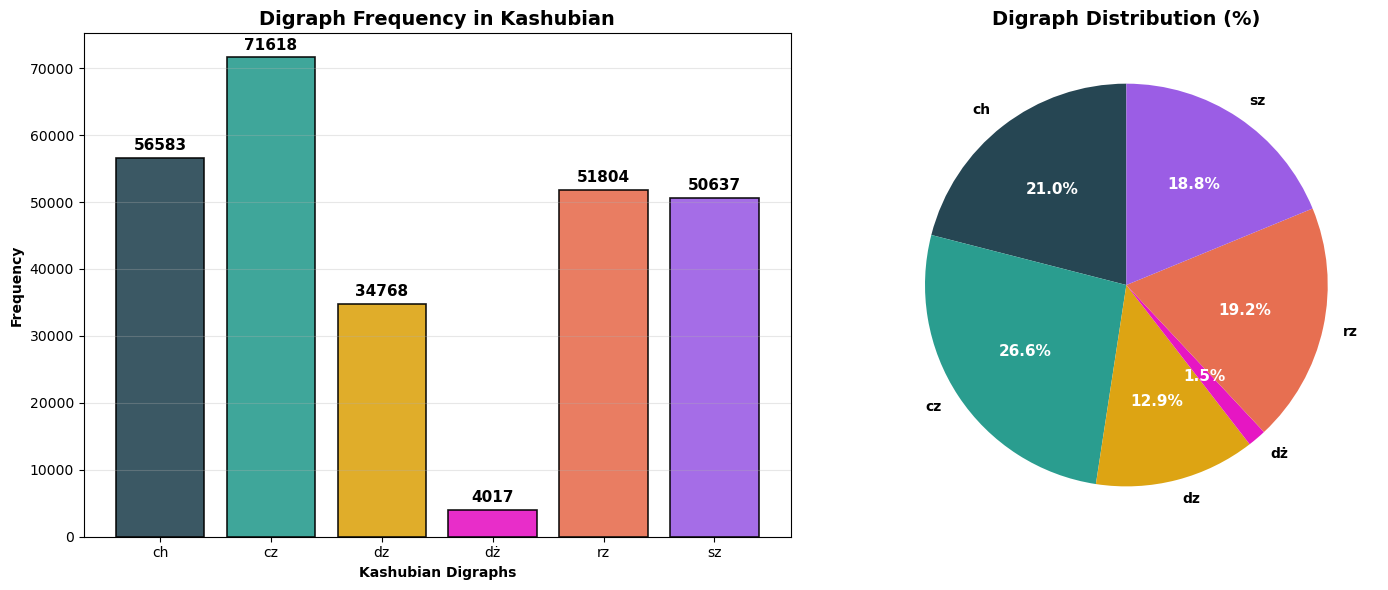

In [299]:
# ordering our digraph-count pairs
digraphs = [dg for dg in digraph_list if dg in digraph_counts]
counts = [digraph_counts[dg] for dg in digraph_list if dg in digraph_counts]

# convert digraph frequencies to percentages
total_digraphs = sum(counts)
percentages = [(count / total_digraphs) * 100 for count in counts]

# dividing our plots into 2 different sections
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

colors = ['#264653', '#2A9D8F', "#DDA413", "#E616C3", '#E76F51', '#9B5DE5']

# setup for the bars on the right
bars = ax1.bar(digraphs, counts, color=colors[:len(digraphs)], 
               edgecolor='black', linewidth=1.2, alpha=0.9)
ax1.set_xlabel('Kashubian Digraphs', fontweight='bold')
ax1.set_ylabel('Frequency', fontweight='bold')
ax1.set_title('Digraph Frequency in Kashubian', fontweight='bold', fontsize=14)
ax1.tick_params(axis='x')
ax1.grid(axis='y', alpha=0.3)

for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + max(counts)*0.01,
             f'{count}', ha='center', va='bottom', fontweight='bold', fontsize=11)
# setup for the pie on the right
wedges, texts, autotexts = ax2.pie(counts, labels=digraphs, autopct='%1.1f%%',
                                  startangle=90, colors=colors[:len(digraphs)],
                                  textprops={'fontweight': 'bold'})
ax2.set_title('Digraph Distribution (%)', fontweight='bold', fontsize=14)

# improves contrast for the pie chart
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')
    autotext.set_fontsize(11)

plt.tight_layout()
plt.show()

In [300]:
# token's first char whose length is greater than 1
words = [token for token in kashub_tokens if token and token[0] in kashub_alphabet and len(token) > 1]  
# extracting the first letter
first_letters = [word[0].lower() for word in words]
# first letter occurence counterr
f_letter_counter = Counter(first_letters)
print("First Letter Frequencies:")
for letter, count in f_letter_counter.most_common():
    print(f"{letter} → {count}")

First Letter Frequencies:
p → 77056
s → 68435
n → 60506
j → 53219
w → 50472
k → 47394
t → 46768
d → 46038
m → 41895
c → 39403
z → 36611
r → 32502
b → 32479
g → 24200
ò → 22532
l → 17945
a → 13412
ù → 9468
o → 5592
e → 5447
f → 4791
i → 4619
h → 4459
u → 2383
ë → 2153
ô → 1206
ó → 450
y → 415
é → 126
ã → 89


In [301]:
# same representation as previous but in terms of percentages
total = sum(f_letter_counter.values())
f_letter_percentages = [(char, (count / total) * 100) for char, count in f_letter_counter.most_common()]

print("First letter percentages:")
for letter, percentage in f_letter_percentages:
    print(f"{letter} → {percentage:.3f}%") # more accuracy to accomdate lower percentages
    

First letter percentages:
p → 10.246%
s → 9.100%
n → 8.045%
j → 7.076%
w → 6.711%
k → 6.302%
t → 6.219%
d → 6.122%
m → 5.571%
c → 5.239%
z → 4.868%
r → 4.322%
b → 4.319%
g → 3.218%
ò → 2.996%
l → 2.386%
a → 1.783%
ù → 1.259%
o → 0.744%
e → 0.724%
f → 0.637%
i → 0.614%
h → 0.593%
u → 0.317%
ë → 0.286%
ô → 0.160%
ó → 0.060%
y → 0.055%
é → 0.017%
ã → 0.012%


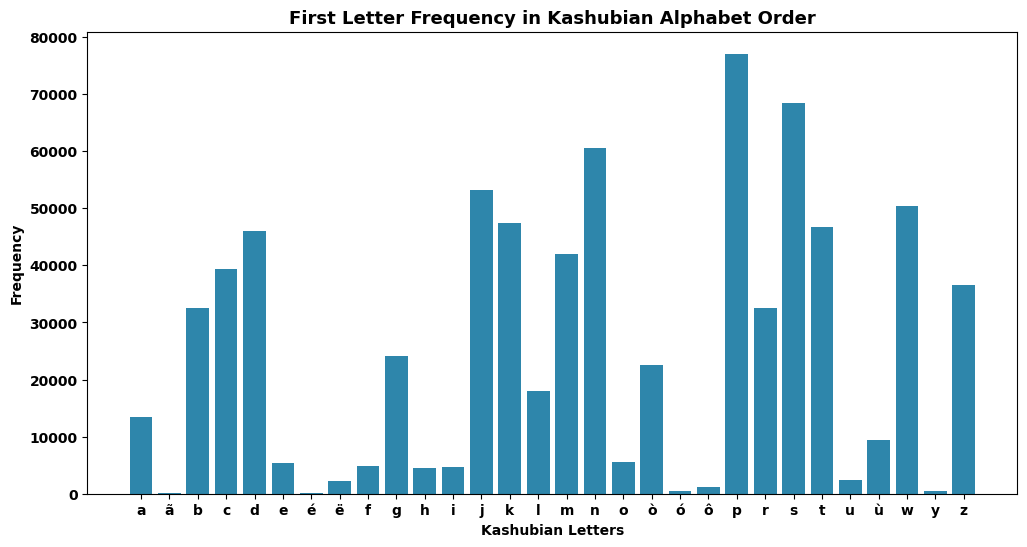

In [302]:
# ordering our letter-count pairs in order
f_letters = [char for char in kashub_alphabet if char in f_letter_counter]
f_counts = [f_letter_counter[char] for char in kashub_alphabet if char in f_letter_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(f_letters, f_counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('First Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [303]:
# token's last char whose length is greater than 1
words = [token for token in kashub_tokens if token and token[len(token)-1] in kashub_alphabet and len(token) > 1]  
# extracting the last letter
last_letters = [word[len(word)-1].lower() for word in words]
# last letter occurence counter
l_letter_counter = Counter(last_letters)
print("First Letter Frequencies:")
for letter, count in l_letter_counter.most_common():
    print(f"{letter} → {count}")

First Letter Frequencies:
a → 97138
e → 84546
i → 64322
o → 57848
ë → 46266
m → 34303
ô → 34196
k → 32573
h → 28864
é → 27200
ò → 26937
ã → 24700
y → 21689
u → 20410
c → 19460
w → 18465
n → 17988
z → 16670
j → 15281
d → 15159
ù → 11969
s → 11347
t → 9137
r → 6440
l → 5683
g → 4497
b → 2772
p → 2579
ó → 1035
f → 838


In [304]:
# same representation as previous but in terms of percentages
total = sum(l_letter_counter.values())
l_letter_percentages = [(char, (count / total) * 100) for char, count in l_letter_counter.most_common()]

print("First letter percentages:")
for letter, percentage in l_letter_percentages:
    print(f"{letter} → {percentage:.3f}%") # more accuracy to accomdate lower percentages
    

First letter percentages:
a → 12.776%
e → 11.120%
i → 8.460%
o → 7.608%
ë → 6.085%
m → 4.512%
ô → 4.498%
k → 4.284%
h → 3.796%
é → 3.577%
ò → 3.543%
ã → 3.249%
y → 2.853%
u → 2.684%
c → 2.559%
w → 2.429%
n → 2.366%
z → 2.193%
j → 2.010%
d → 1.994%
ù → 1.574%
s → 1.492%
t → 1.202%
r → 0.847%
l → 0.747%
g → 0.591%
b → 0.365%
p → 0.339%
ó → 0.136%
f → 0.110%


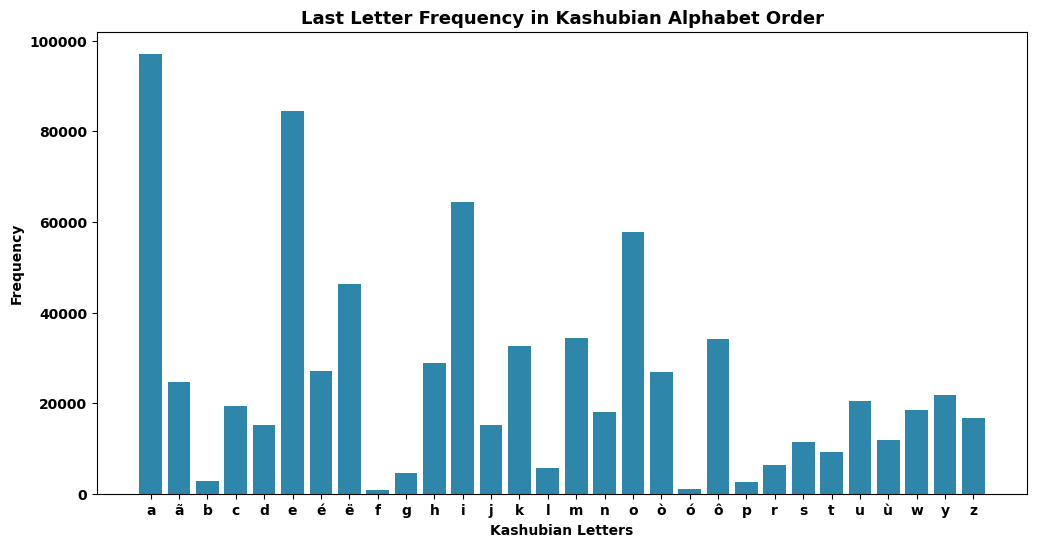

In [305]:
# ordering our l_letter-count pairs in order
l_letters = [char for char in kashub_alphabet if char in l_letter_counter]
l_counts = [l_letter_counter[char] for char in kashub_alphabet if char in l_letter_counter]

# simple plot with better contrast
plt.figure(figsize=(12, 6))
plt.bar(l_letters, l_counts, color='#2E86AB')

plt.xlabel('Kashubian Letters', fontweight='bold')  
plt.ylabel('Frequency', fontweight='bold') 
plt.title('Last Letter Frequency in Kashubian Alphabet Order', fontweight='bold', fontsize=13)

plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

plt.show()

In [306]:
print(f"Data consists of {len(kashub_tokens)} tokens")


Data consists of 764225 tokens


In [307]:
print(f"Data contains {len(corpus_collection_str)} characters")

Data contains 6081485 characters


In [308]:
token_freq = Counter(kashub_tokens)
output_file = 'kashubian_lexical.tsv'

# export to tsv (for keyman dev lexical model)
with open('kashubian_lexical.tsv', 'w', encoding='utf-8') as f:
    for word, freq in token_freq.items():
        f.write(f"{word}\t{freq}\n")

In [310]:
# sample of character combinations
test_inputs = ['kasz', 'jã', 'prz', 'wë', 'ò', 'nie', 'gmi', 'kal', 'wòj'] + diagraph_list
# testing some inputs with the diagraph list
for test in test_inputs:
    matches = [(w, f) for w, f in token_freq.items() if w.startswith(test)]
    top = sorted(matches, key=lambda x: -x[1])[:10]
    if top:
        words = [w for w, f in top]
        print(f"Input '{test}': {words}")
    else:
        print(f"Input '{test}': No matches")

Input 'kasz': ['kaszëbsczi', 'kaszëbach', 'kaszëbskô', 'kaszëbsczégò', 'kaszëbów', 'kaszëbi', 'kaszëbsczim', 'kaszubów', 'kaszëbsczich', 'kaszëbë']
Input 'jã': ['jãzëka', 'jãzëk', 'jã', 'jãzëkù', 'jãzëków', 'jãzëkã', 'jãzëkach', 'jãzëczi', 'jãzëkòwi', 'jãzëkama']
Input 'prz': ['przez', 'przed', 'przë', 'przëpôd', 'przede', 'przestãpny', 'przedstawi', 'przëszed', 'przigòdë', 'przódë']
Input 'wë': ['wënôszaa', 'wëpiszë', 'wë', 'wëjimk', 'wëwidnij', 'wëzdrzi', 'wëi', 'wëzdrzatk', 'wëstpiwô', 'wësok']
Input 'ò': ['òd', 'òn', 'òna', 'òdjimków', 'òb', 'òne', 'òni', 'òstô', 'òbédze', 'òsta']
Input 'nie': ['nie', 'niechtërnëch', 'nieprzestãpny', 'niegò', 'niech', 'niedzelã', 'niemców', 'nieba', 'nierôz', 'niebie']
Input 'gmi': ['gminie', 'gmina', 'gminë', 'gmin', 'gminy', 'gminnô', 'gminów', 'gminach', 'gminô', 'gminowô']
Input 'kal': ['kalãdôrz', 'kalãdôrza', 'kalãdôrzu', 'kalinowski', 'kalwarii', 'kalvariji', 'kalisz', 'kalifòrnijë', 'kalvarijach', 'kaliningrad']
Input 'wòj': ['wòjewództwie'